In [ ]:

## setting up TPU to run the model
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
 
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.124.205.226:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.124.205.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.124.205.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
import csv

# **Understanding Dataset**

In [ ]:
# dataset
data = pd.read_csv('./finalDS.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.head()

,Unnamed: 0,Adj Close,Close,Date,High,Low,Open,Volume,S&P 500 PE Ratio
0,0,3756.07,3756.07,2020-12-31,3760.20,3726.88,3733.27,3172510000,37.850000
1,1,3732.04,3732.04,2020-12-30,3744.63,3730.21,3736.19,3145200000,37.842333
2,2,3727.04,3727.04,2020-12-29,3756.12,3723.31,3750.01,3387030000,37.834667
3,3,3735.36,3735.36,2020-12-28,3740.51,3723.03,3723.03,3527460000,37.827000
4,4,3703.06,3703.06,2020-12-24,3703.82,3689.32,3694.03,1885090000,37.796333


In [ ]:
data.corr()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume,S&P 500 PE Ratio
Unnamed: 0,1.000000,-0.877879,-0.877879,-0.878135,-0.877547,-0.888380,-0.797884,-0.356479
Adj Close,-0.877879,1.000000,1.000000,0.999954,0.999958,0.998869,0.788650,0.326397
Close,-0.877879,1.000000,1.000000,0.999954,0.999958,0.998869,0.788650,0.326397
High,-0.878135,0.999954,0.999954,1.000000,0.999928,0.998926,0.790033,0.327387
Low,-0.877547,0.999958,0.999958,0.999928,1.000000,0.998889,0.787326,0.325252
Open,-0.888380,0.998869,0.998869,0.998926,0.998889,1.000000,0.790070,0.335060
Volume,-0.797884,0.788650,0.788650,0.790033,0.787326,0.790070,1.000000,0.463905
S&P 500 PE Ratio,-0.356479,0.326397,0.326397,0.327387,0.325252,0.335060,0.463905,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15355 entries, 0 to 15354
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        15355 non-null  int64         
 1   Adj Close         15355 non-null  float64       
 2   Close             15355 non-null  float64       
 3   Date              15355 non-null  datetime64[ns]
 4   High              15355 non-null  float64       
 5   Low               15355 non-null  float64       
 6   Open              15355 non-null  float64       
 7   Volume            15355 non-null  int64         
 8   S&P 500 PE Ratio  15355 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 1.1 MB


(array([711858., 715510., 719163., 722815., 726468., 730120., 733773.,
        737425., 741078.]), <a list of 9 Text major ticklabel objects>)

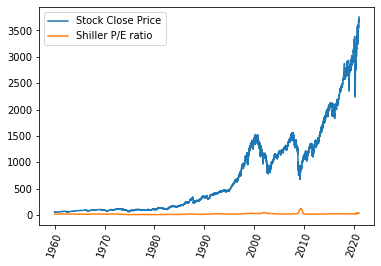

In [ ]:
#Overlay of Shiller P/E ratio from 1 Jan 1960 to 31 Dec 2020 onto S&P 500 for the same period
plt.figure()
plt.plot(data['Date'],data['Close'],label='Stock Close Price')
plt.plot(data['Date'],data['S&P 500 PE Ratio'],label='Shiller P/E ratio')
plt.legend()
plt.xticks(rotation=70)

In [ ]:
# normalizing the data
nRows = data.shape[0]
window = 180
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit(data[['Close']].values)
normalized_data = scaled_data.transform(data[['Close']].values)
normalized_data[0:5]

array([[1.        ],
       [0.99351219],
       [0.99216225],
       [0.99440855],
       [0.98568794]])

In [ ]:
X=[]
y=[]
for i in range(window,nRows,1):
  X.append(normalized_data[i-window:i])
  y.append(normalized_data[i])
len(X),len(y)

(15175, 15175)

In [ ]:
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1], 1)
print('Input Data shape: ')
print(X.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y=np.array(y)
y=y.reshape(y.shape[0], 1)
print('Output Data shape: ')
print(y.shape)

Input Data shape: 
(15175, 180, 1)
Output Data shape: 
(15175, 1)


In [ ]:
#selecting test data as data from 2015 to 2020
split = 1510
X_train=X[:-split]
X_test=X[-split:]
y_train=y[:-split]
y_test=y[-split:]
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(13665, 180, 1) (13665, 1) (1510, 180, 1) (1510, 1)


In [ ]:
# printing number of features and time steps
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 180
Number of Features: 1



# **Unoptimized model**
## epochs=1 

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =1,batch_size=32)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 180, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 180, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 180, 50)           20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 180, 50)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

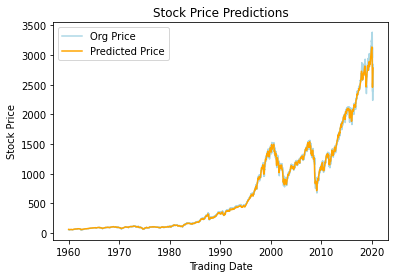

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

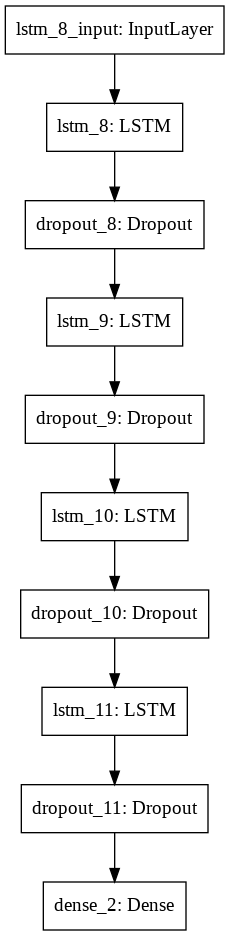

In [ ]:
#saving the model built
model.save('./LSTM.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price


array([[2782.6921  ],
       [2777.4832  ],
       [2772.8416  ],
       ...,
       [ 111.6835  ],
       [ 111.265205],
       [ 110.91057 ]], dtype=float32)

Prediction error [[-0.00602163]
 [-0.00211142]
 [-0.02572625]
 ...
 [ 0.04847449]
 [ 0.05745301]
 [ 0.04870053]]
Accuracy: 97.63892336116149


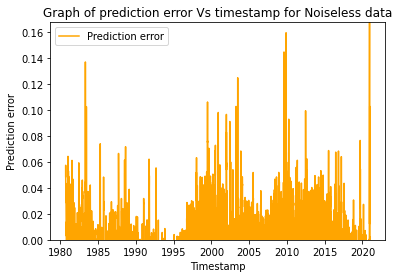

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


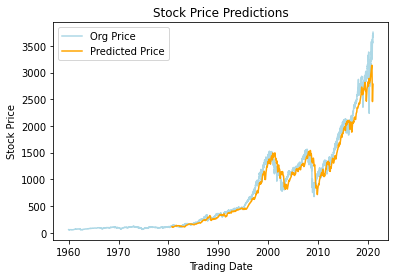

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# **Optimized model**
# epochs=1

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =1,batch_size=32)
  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 180, 50)           10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

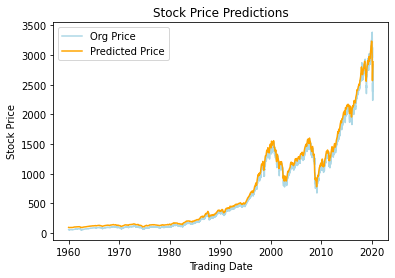

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

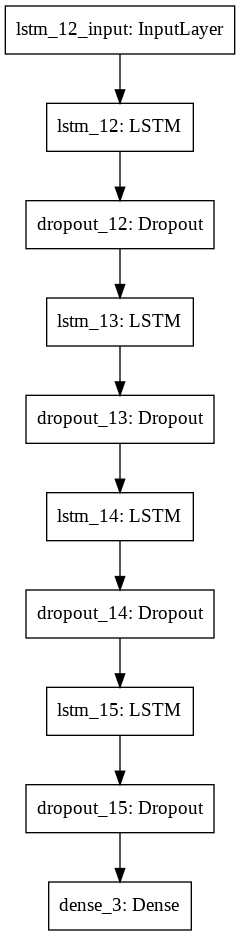

In [ ]:
# saving the model built
model.save('./LSTM1.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price


array([[2888.055  ],
       [2882.7878 ],
       [2877.5803 ],
       ...,
       [ 148.90509],
       [ 148.60432],
       [ 148.3206 ]], dtype=float32)

Prediction error [[0.03161398]
 [0.03572224]
 [0.01107507]
 ...
 [0.39790734]
 [0.41232013]
 [0.40242627]]
Accuracy: 90.48654802222066


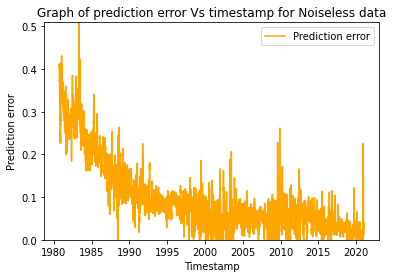

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


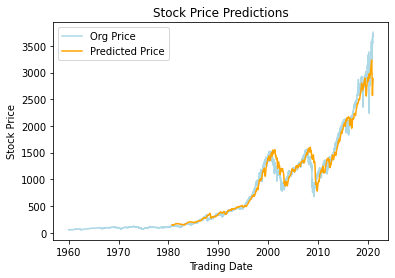

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Unoptimized model**
# epochs=10

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =10,batch_size=32)
  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 180, 50)           10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)               

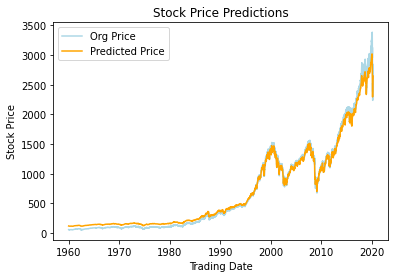

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

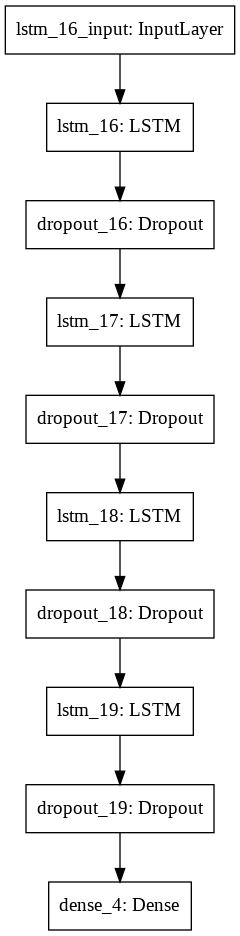

In [ ]:
# saving the model built
model.save('/content/LSTM2.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price


array([[2647.5105 ],
       [2643.6758 ],
       [2640.1543 ],
       ...,
       [ 162.89117],
       [ 162.4178 ],
       [ 161.95274]], dtype=float32)

Prediction error [[-0.05430855]
 [-0.05018547]
 [-0.07234763]
 ...
 [ 0.52920742]
 [ 0.54360199]
 [ 0.53132322]]
Accuracy: 90.67763400318779


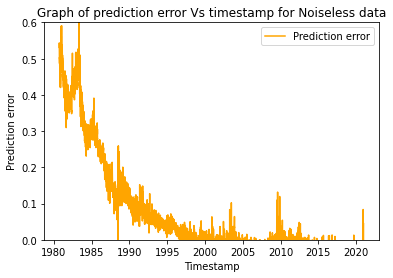

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


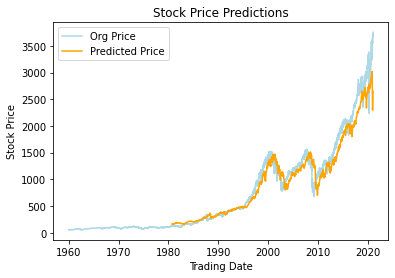

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Optimized model**
# epochs=10

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =10,batch_size=32)
  

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 180, 50)           10400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)               

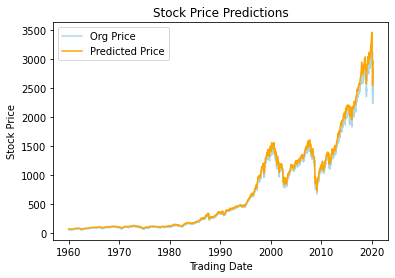

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

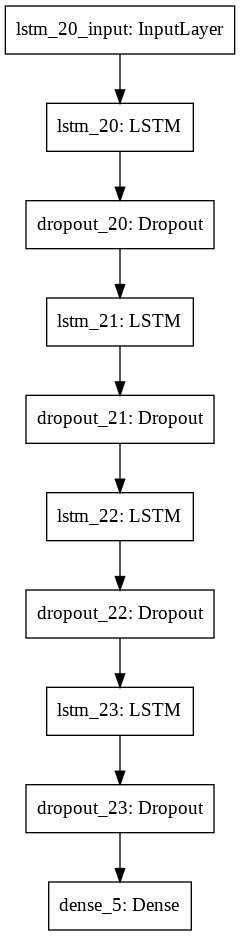

In [ ]:
# saving the model built
model.save('/content/LSTM3.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price

array([[2960.5083  ],
       [2952.7969  ],
       [2945.5962  ],
       ...,
       [ 122.598114],
       [ 122.25134 ],
       [ 121.77846 ]], dtype=float32)

Prediction error [[0.05749435]
 [0.06087494]
 [0.03497333]
 ...
 [0.15093986]
 [0.16186412]
 [0.15146045]]
Accuracy: 95.53508552151057


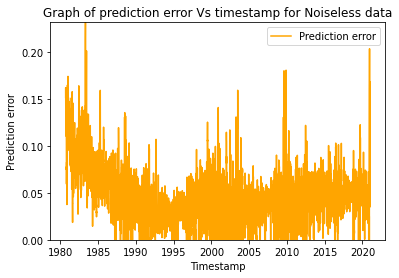

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


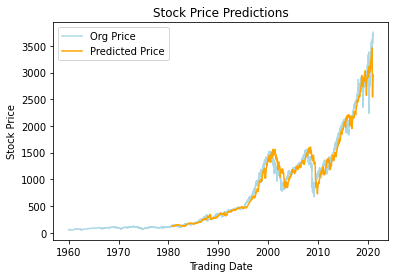

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Unoptimized model**
# epochs=100

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =100,batch_size=32)
  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 180, 50)           10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)               

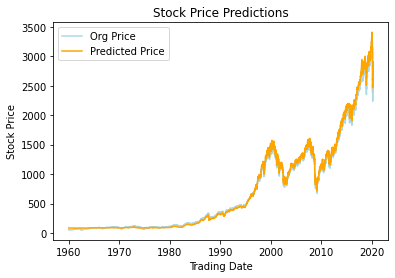

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

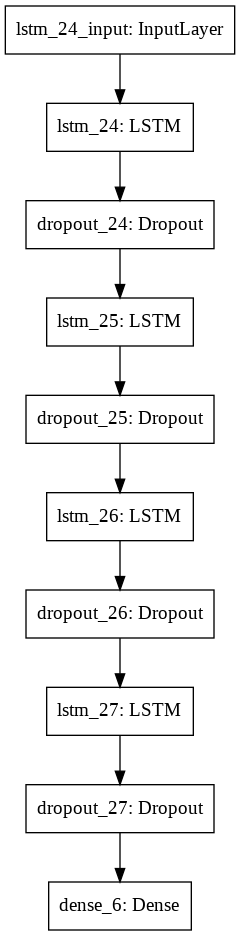

In [ ]:
#saving the model built
model.save('/content/LSTM4.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price

array([[2906.0718  ],
       [2903.8809  ],
       [2870.6345  ],
       ...,
       [  95.37093 ],
       [  95.087906],
       [  95.32347 ]], dtype=float32)

Prediction error [[ 0.03804961]
 [ 0.04330049]
 [ 0.00863458]
 ...
 [-0.10466641]
 [-0.09629437]
 [-0.09868125]]
Accuracy: 95.13829265561242


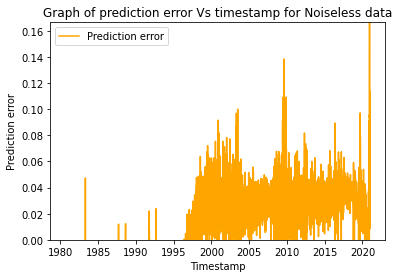

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


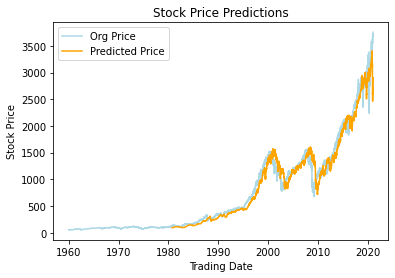

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Optimized model**
# epochs=100

In [ ]:
# Training the model
with tpu_strategy.scope():
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))
  
  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.TruePositives()])
  
  model.summary()
  
  # Fitting the RNN to the Training set
  
  model.fit(X_train, y_train, epochs =100,batch_size=32)
  

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 180, 50)           10400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 180, 50)           20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 180, 50)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)               

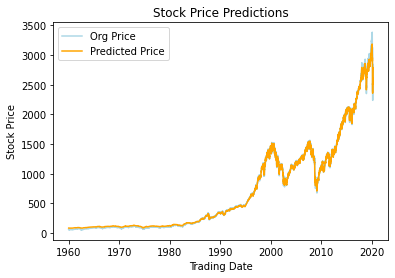

In [ ]:
TrainPredictions=scaled_data.inverse_transform(model.predict(X_train))
TestPredictions=scaled_data.inverse_transform(model.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# plotting the full data
plt.figure()
plt.plot(FullDataOrig['Date'],FullDataOrig['Close'], color = 'lightblue', label = 'Org Price')
plt.plot(FullDataOrig['Date'],FullDataPredictions, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

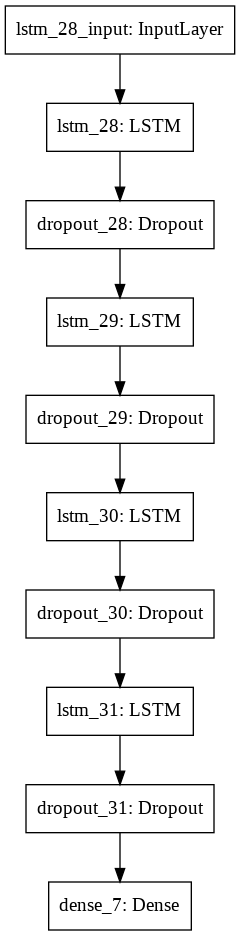

In [ ]:
# saving the model built
model.save('/content/LSTM5.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Xt=[]
yt=[]
test1980 = np.array(data['Close'].values[:10340])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,10340,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
predicted_Price

array([[2789.2507 ],
       [2793.0442 ],
       [2767.269  ],
       ...,
       [ 124.24113],
       [ 123.9039 ],
       [ 123.62242]], dtype=float32)

Prediction error [[-0.0036789 ]
 [ 0.00347932]
 [-0.02768422]
 ...
 [ 0.16636432]
 [ 0.17756986]
 [ 0.16889581]]
Accuracy: 97.723389453468


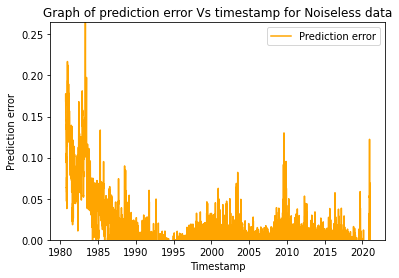

In [ ]:
# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print('Prediction error', prediction_error)
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
plt.figure()


plt.plot(data['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'orange', label = 'Prediction error')
plt.ylim((0,max(prediction_error)))
plt.title('Graph of prediction error Vs timestamp for Noiseless data')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')

plt.legend()
plt.show()


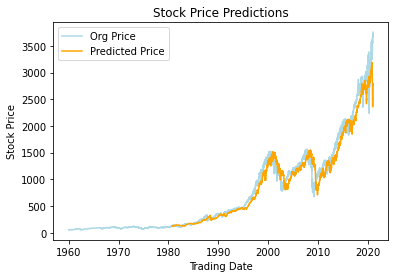

In [ ]:
FullDataPredictions=np.append(TrainPredictions, predicted_Price)
FullDataOrig=data[TimeSteps:]
# plotting the full data
plt.figure()
plt.plot(data['Date'],data['Close'],color = 'lightblue', label = 'Org Price')
plt.plot(data['Date'].values[:predicted_Price.shape[0]],predicted_Price, color = 'orange', label = 'Predicted Price')
#plt.plot(FullDataOrig['Date'],FullDataOrig , color = 'blue', label = 'Original Price')
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Inducing noise

In [ ]:
dates = data["Date"].tolist()
data.drop(columns=["Date"], index=1, inplace=True)
clean_signal1 = pd.DataFrame(data) 
clean_signal2 = pd.DataFrame(data) 
clean_signal3 = pd.DataFrame(data) 
clean_signal4 = pd.DataFrame(data) 
clean_signal5 = pd.DataFrame(data) 
clean_signal6 = pd.DataFrame(data) 
clean_signal7 = pd.DataFrame(data) 
clean_signal8 = pd.DataFrame(data) 
clean_signal9 = pd.DataFrame(data) 

import random
random.seed(1)

#-----------------------------------------inducing noise with std dev 0.001-----------------------------
rands=random.sample(range(0,1510), 144)

 

for  index, row in clean_signal1.loc[rands].iterrows():
    mu, sigma = 0, 0.001
    noise1= np.random.normal(mu, sigma) 
    row=row+noise1
    #print(row)

#--------------------------------inducing noise with std dev 0.002-----------------------------------
random.seed(2)
rands1=random.sample(range(0,1510), 144)


for  index, row in clean_signal2.loc[rands1].iterrows():
   
    mu, sigma = 0, 0.002
    noise2= np.random.normal(mu, sigma) 
    row=row+noise2
 #---------------------------inducing noise with std dev 0.003-------------------------------
random.seed(3)
rands2=random.sample(range(0,1510), 144)
for  index, row in clean_signal3.loc[rands2].iterrows():
    mu, sigma = 0, 0.003
    noise3= np.random.normal(mu, sigma) 
    row=row+noise3
#---------------------------inducing noise with std dev 0.005-------------------------------

random.seed(4)
rands3=random.sample(range(0,1510), 144)
for  index, row in clean_signal4.loc[rands3].iterrows():
    mu, sigma = 0, 0.005
    noise4= np.random.normal(mu, sigma) 
    row=row+noise4
#-----------------------------inducing noise with std dev 0.01--------------------------
random.seed(5)
rands4=random.sample(range(0,1510), 144)
for  index, row in clean_signal5.loc[rands4].iterrows():
    mu, sigma = 0, 0.01
    noise5= np.random.normal(mu, sigma) 
    row=row+noise5


#-----------------------------inducing noise with std dev 0.02--------------------------
random.seed(6)
rands5=random.sample(range(0,1510), 144)
for  index, row in clean_signal6.loc[rands5].iterrows():
    mu, sigma = 0, 0.02
    noise6= np.random.normal(mu, sigma) 
    row=row+noise6

#-----------------------------inducing noise with std dev 0.03--------------------------
random.seed(7)
rands6=random.sample(range(0,1510), 144)
for  index, row in clean_signal7.loc[rands6].iterrows():
    mu, sigma = 0, 0.03
    noise7= np.random.normal(mu, sigma) 
    row=row+noise7
#-----------------------------inducing noise with std dev 0.05--------------------------
random.seed(8)
rands7=random.sample(range(0,1510), 144)
for  index, row in clean_signal8.loc[rands7].iterrows():
    mu, sigma = 0, 0.05
    noise8= np.random.normal(mu, sigma) 
    row=row+noise8 

#-----------------------------inducing noise with std dev 0.1--------------------------
random.seed(0)
rands8=random.sample(range(0,1510), 144)
for  index, row in clean_signal9.loc[rands8].iterrows():
    mu, sigma = 0, 0.1
    noise9= np.random.normal(mu, sigma) 
    row=row+noise9 
        
    
    


#clean_signal=clean_signal.sample(frac=0.10)
noisy_signal1 = clean_signal1 
noisy_signal2 = clean_signal2 
noisy_signal3 = clean_signal3 
noisy_signal4 = clean_signal4 
noisy_signal5 = clean_signal5 
noisy_signal6 = clean_signal6 
noisy_signal7 = clean_signal7 
noisy_signal8 = clean_signal8
noisy_signal9 = clean_signal9 

#print(clean_signal)

noisy_signal1['Date'] = pd.Series(dates)
noisy_signal2['Date'] = pd.Series(dates)
noisy_signal3['Date'] = pd.Series(dates)
noisy_signal4['Date'] = pd.Series(dates)
noisy_signal5['Date'] = pd.Series(dates)
noisy_signal6['Date'] = pd.Series(dates)
noisy_signal7['Date'] = pd.Series(dates)
noisy_signal8['Date'] = pd.Series(dates)
noisy_signal9['Date'] = pd.Series(dates)

In [ ]:
#-------------------------------------------predicting for std dev=0.001----------------------------------------
Xt=[]
yt=[]
test1980 = np.array(noisy_signal1['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt.append(test1980[i-window:i])
  yt.append(test1980[i])
Xt = np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1], 1)
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)

# Making predictions on test data
predicted_Price = model.predict(Xt)
predicted_Price = scaled_data.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=yt
orig=scaled_data.inverse_transform(yt)
 
# Accuracy of the predictions

prediction_error = (predicted_Price-orig)/(orig)
print(type(prediction_error))


#------------------------------------predicting the values for std dev=0.002------------------------------------
Xt1=[]
yt1=[]
test1980 = np.array(noisy_signal2['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt1.append(test1980[i-window:i])
  yt1.append(test1980[i])
Xt1 = np.array(Xt1)
Xt1=Xt1.reshape(Xt1.shape[0],Xt1.shape[1], 1)
predicted_Price1 = model.predict(Xt1)
predicted_Price1 = scaled_data.inverse_transform(predicted_Price1)

# Making predictions on test data
predicted_Price1 = model.predict(Xt1)
predicted_Price1 = scaled_data.inverse_transform(predicted_Price1)
 
# Getting the original price values for testing data
orig1=yt1
orig1=scaled_data.inverse_transform(yt1)
 
# Accuracy of the predictions

prediction_error1 = (predicted_Price1-orig1)/(orig1)





#------------------------------------predicting the values for std dev=0.003------------------------------------
Xt2=[]
yt2=[]
test1980 = np.array(noisy_signal2['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt2.append(test1980[i-window:i])
  yt2.append(test1980[i])
Xt2 = np.array(Xt2)
Xt2=Xt2.reshape(Xt2.shape[0],Xt2.shape[1], 1)
predicted_Price2 = model.predict(Xt2)
predicted_Price2 = scaled_data.inverse_transform(predicted_Price2)

# Making predictions on test data
predicted_Price2 = model.predict(Xt2)
predicted_Price2 = scaled_data.inverse_transform(predicted_Price2)
 
# Getting the original price values for testing data
orig2=yt2
orig2=scaled_data.inverse_transform(yt2)
 
# Accuracy of the predictions

prediction_error2 = (predicted_Price2-orig2)/(orig2)

#------------------------------------predicting the values for std dev=0.005------------------------------------
Xt3=[]
yt3=[]
test1980 = np.array(noisy_signal3['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt3.append(test1980[i-window:i])
  yt3.append(test1980[i])
Xt3 = np.array(Xt3)
Xt3=Xt3.reshape(Xt3.shape[0],Xt3.shape[1], 1)
predicted_Price3 = model.predict(Xt3)
predicted_Price3 = scaled_data.inverse_transform(predicted_Price3)

# Making predictions on test data
predicted_Price3 = model.predict(Xt3)
predicted_Price3 = scaled_data.inverse_transform(predicted_Price3)
 
# Getting the original price values for testing data
orig3=yt3
orig3=scaled_data.inverse_transform(yt3)
 
# Accuracy of the predictions

prediction_error3 = (predicted_Price3-orig3)/(orig3)


#------------------------------------predicting the values for std dev=0.01------------------------------------
Xt4=[]
yt4=[]
test1980 = np.array(noisy_signal4['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt4.append(test1980[i-window:i])
  yt4.append(test1980[i])
Xt4 = np.array(Xt4)
Xt4=Xt4.reshape(Xt4.shape[0],Xt4.shape[1], 1)
predicted_Price4 = model.predict(Xt4)
predicted_Price4 = scaled_data.inverse_transform(predicted_Price4)

# Making predictions on test data
predicted_Price4 = model.predict(Xt4)
predicted_Price4 = scaled_data.inverse_transform(predicted_Price4)
 
# Getting the original price values for testing data
orig4=yt4
orig4=scaled_data.inverse_transform(yt4)
 
# Accuracy of the predictions

prediction_error4 = (predicted_Price4-orig4)/(orig4)


#------------------------------------predicting the values for std dev=0.02------------------------------------
Xt5=[]
yt5=[]
test1980 = np.array(noisy_signal5['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt5.append(test1980[i-window:i])
  yt5.append(test1980[i])
Xt5 = np.array(Xt5)
Xt5=Xt5.reshape(Xt5.shape[0],Xt5.shape[1], 1)
predicted_Price5 = model.predict(Xt5)
predicted_Price5 = scaled_data.inverse_transform(predicted_Price5)

# Making predictions on test data
predicted_Price5 = model.predict(Xt5)
predicted_Price5 = scaled_data.inverse_transform(predicted_Price5)
 
# Getting the original price values for testing data
orig5=yt5
orig5=scaled_data.inverse_transform(yt5)
 
# Accuracy of the predictions

prediction_error5 = (predicted_Price5-orig5)/(orig5)

#------------------------------------predicting the values for std dev=0.03------------------------------------
Xt6=[]
yt6=[]
test1980 = np.array(noisy_signal6['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt6.append(test1980[i-window:i])
  yt6.append(test1980[i])
Xt6 = np.array(Xt6)
Xt6=Xt6.reshape(Xt6.shape[0],Xt6.shape[1], 1)
predicted_Price6 = model.predict(Xt6)
predicted_Price6 = scaled_data.inverse_transform(predicted_Price6)

# Making predictions on test data
predicted_Price6 = model.predict(Xt6)
predicted_Price6 = scaled_data.inverse_transform(predicted_Price6)
 
# Getting the original price values for testing data
orig6=yt6
orig6=scaled_data.inverse_transform(yt6)
 
# Accuracy of the predictions

prediction_error6 = (predicted_Price6-orig6)/(orig6)


#------------------------------------predicting the values for std dev=0.05------------------------------------
Xt7=[]
yt7=[]
test1980 = np.array(noisy_signal7['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt7.append(test1980[i-window:i])
  yt7.append(test1980[i])
Xt7= np.array(Xt7)
Xt7=Xt7.reshape(Xt7.shape[0],Xt7.shape[1], 1)
predicted_Price7= model.predict(Xt7)
predicted_Price7 = scaled_data.inverse_transform(predicted_Price7)

# Making predictions on test data
predicted_Price7 = model.predict(Xt7)
predicted_Price7 = scaled_data.inverse_transform(predicted_Price7)
 
# Getting the original price values for testing data
orig7=yt7
orig7=scaled_data.inverse_transform(yt7)
 
# Accuracy of the predictions

prediction_error7 = (predicted_Price7-orig7)/(orig7)


#------------------------------------predicting the values for std dev=0.1------------------------------------
Xt8=[]
yt8=[]
test1980 = np.array(noisy_signal8['Close'].values[1510:])
test1980 = scaled_data.transform(test1980.reshape(-1,1))
for i in range(window,1510,1):
  Xt8.append(test1980[i-window:i])
  yt8.append(test1980[i])
Xt8= np.array(Xt8)
Xt8=Xt8.reshape(Xt8.shape[0],Xt8.shape[1], 1)
predicted_Price8= model.predict(Xt8)
predicted_Price8 = scaled_data.inverse_transform(predicted_Price8)

# Making predictions on test data
predicted_Price8 = model.predict(Xt8)
predicted_Price8 = scaled_data.inverse_transform(predicted_Price8)
 
# Getting the original price values for testing data
orig8=yt8
orig8=scaled_data.inverse_transform(yt8)
 
# Accuracy of the predictions

prediction_error8 = (predicted_Price8-orig8)/(orig8)






<class 'numpy.ndarray'>


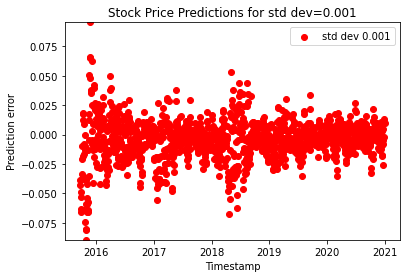

In [ ]:
plt.scatter(noisy_signal1['Date'].values[:predicted_Price.shape[0]],prediction_error, color = 'red', label = 'std dev 0.001')

plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.001')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

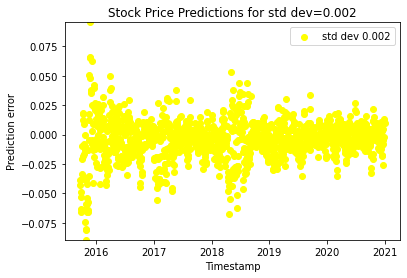

In [ ]:
plt.scatter(noisy_signal2['Date'].values[:predicted_Price.shape[0]],prediction_error1, color = 'yellow', label = 'std dev 0.002')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.002')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

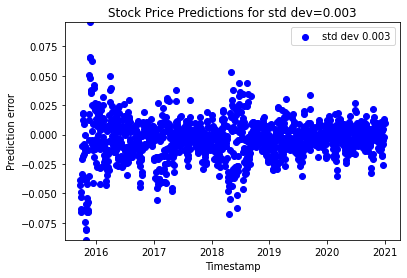

In [ ]:
plt.scatter(noisy_signal3['Date'].values[:predicted_Price.shape[0]],prediction_error2, color = 'blue', label = 'std dev 0.003')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.003')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

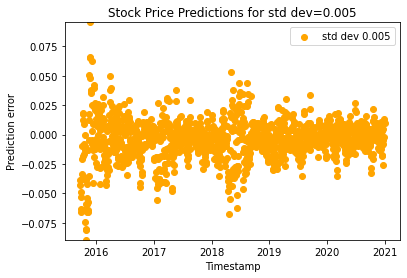

In [ ]:
plt.scatter(noisy_signal4['Date'].values[:predicted_Price.shape[0]],prediction_error3, color = 'orange', label = 'std dev 0.005')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.005')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

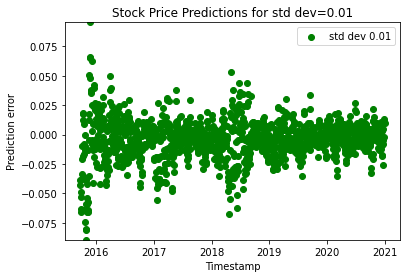

In [ ]:
plt.scatter(noisy_signal5['Date'].values[:predicted_Price.shape[0]],prediction_error4, color = 'green', label = 'std dev 0.01')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.01')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

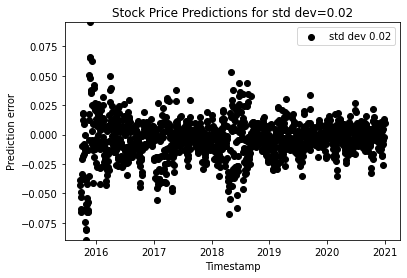

In [ ]:
plt.scatter(noisy_signal6['Date'].values[:predicted_Price.shape[0]],prediction_error5, color = 'black', label = 'std dev 0.02')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.02')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

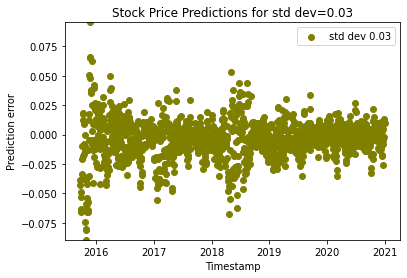

In [ ]:
plt.scatter(noisy_signal7['Date'].values[:predicted_Price.shape[0]],prediction_error6, color = 'olive', label = 'std dev 0.03')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.03')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

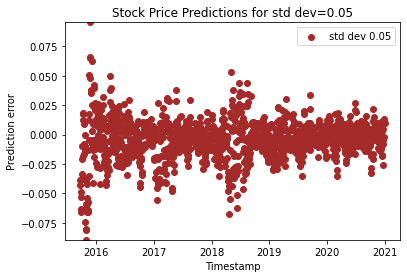

In [ ]:
plt.scatter(noisy_signal8['Date'].values[:predicted_Price.shape[0]],prediction_error7, color = 'brown', label = 'std dev 0.05')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std dev=0.05')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

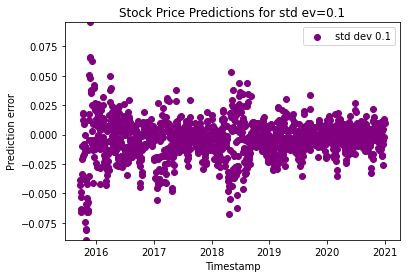

In [ ]:
plt.scatter(noisy_signal9['Date'].values[:predicted_Price.shape[0]],prediction_error8, color = 'purple', label = 'std dev 0.1')
plt.ylim((min(prediction_error),max(prediction_error)))
plt.title('Stock Price Predictions for std ev=0.1')
plt.xlabel('Timestamp')
plt.ylabel('Prediction error')
plt.legend()
plt.show()

In [ ]:
prediction_error=prediction_error.tolist()
prediction_error1=prediction_error1.tolist()
prediction_error2=prediction_error2.tolist()
prediction_error3=prediction_error3.tolist()
prediction_error4=prediction_error4.tolist()
prediction_error5=prediction_error5.tolist()
prediction_error6=prediction_error6.tolist()
prediction_error7=prediction_error7.tolist()
prediction_error8=prediction_error8.tolist()


data_noisy = {'stddev0.001': prediction_error, 'stddev0.002': prediction_error1, 'stddev0.003': prediction_error2, 'stddev0.005': prediction_error3, 'stddev0.01': prediction_error4, 'stddev0.02': prediction_error5,'stddev0.03': prediction_error6, 'stddev0.05': prediction_error7, 'stddev0.1': prediction_error8}
df = pd.DataFrame(data=data_noisy)
pd.set_option('display.max_columns', None)

print(df)


                   stddev0.001               stddev0.002  \
0        [0.00955734416034085]     [0.00955734416034085]   
1       [0.011063678910308641]    [0.011063678910308641]   
2       [0.013486737479966263]    [0.013486737479966263]   
3     [-0.0024600363101309965]  [-0.0024600363101309965]   
4      [-0.025997795997680664]   [-0.025997795997680664]   
...                        ...                       ...   
1325    [-0.06577861432358366]    [-0.06577861432358366]   
1326   [-0.048861017270825265]   [-0.048861017270825265]   
1327     [-0.0632316121649995]     [-0.0632316121649995]   
1328    [-0.04274381262972402]    [-0.04274381262972402]   
1329    [-0.03856495670761559]    [-0.03856495670761559]   

                   stddev0.003               stddev0.005  \
0        [0.00955734416034085]     [0.00955734416034085]   
1       [0.011063678910308641]    [0.011063678910308641]   
2       [0.013486737479966263]    [0.013486737479966263]   
3     [-0.0024600363101309965]  [-0.002

In [ ]:
# table of predicted error vs time with one row for each value of standard deviation
df2 = df.copy()
with pd.ExcelWriter('output.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')